In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Toyota.xlsx to Toyota (1).xlsx


In [3]:
toyo=pd.read_excel("Toyota.xlsx")

In [4]:
toyo.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90.0,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90.0,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90.0,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90.0,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90.0,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
toyo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1436 non-null   int64  
 1   Model             1436 non-null   object 
 2   Price             1436 non-null   int64  
 3   Age_08_04         1436 non-null   int64  
 4   Mfg_Month         1436 non-null   int64  
 5   Mfg_Year          1436 non-null   int64  
 6   KM                1436 non-null   int64  
 7   Fuel_Type         1436 non-null   object 
 8   HP                1434 non-null   float64
 9   Met_Color         1436 non-null   int64  
 10  Color             1436 non-null   object 
 11  Automatic         1436 non-null   int64  
 12  cc                1436 non-null   int64  
 13  Doors             1436 non-null   int64  
 14  Cylinders         1436 non-null   int64  
 15  Gears             1436 non-null   int64  
 16  Quarterly_Tax     1436 non-null   int64  


In [6]:
toyo.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [7]:
toyota=toyo[['Model','Price','Age_08_04','KM', 'HP','cc','Doors','Gears','Quarterly_Tax', 'Weight']]

In [8]:
toyota.head()

,Model,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90.0,2000,3,5,210,1165
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90.0,2000,3,5,210,1165
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90.0,2000,3,5,210,1165
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90.0,2000,3,5,210,1165
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90.0,2000,3,5,210,1170


In [9]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          1436 non-null   object 
 1   Price          1436 non-null   int64  
 2   Age_08_04      1436 non-null   int64  
 3   KM             1436 non-null   int64  
 4   HP             1434 non-null   float64
 5   cc             1436 non-null   int64  
 6   Doors          1436 non-null   int64  
 7   Gears          1436 non-null   int64  
 8   Quarterly_Tax  1436 non-null   int64  
 9   Weight         1436 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 112.3+ KB


In [10]:
toyota.corr()

<ipython-input-10-59f1d2bf278b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  toyota.corr()


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.317251,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.157875,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333913,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.317251,-0.157875,-0.333913,1.000000,0.036326,0.091713,0.209425,-0.297842,0.091855
cc,0.126389,-0.098084,0.102683,0.036326,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.091713,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209425,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.297842,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.091855,0.335637,0.302618,0.020613,0.626134,1.000000


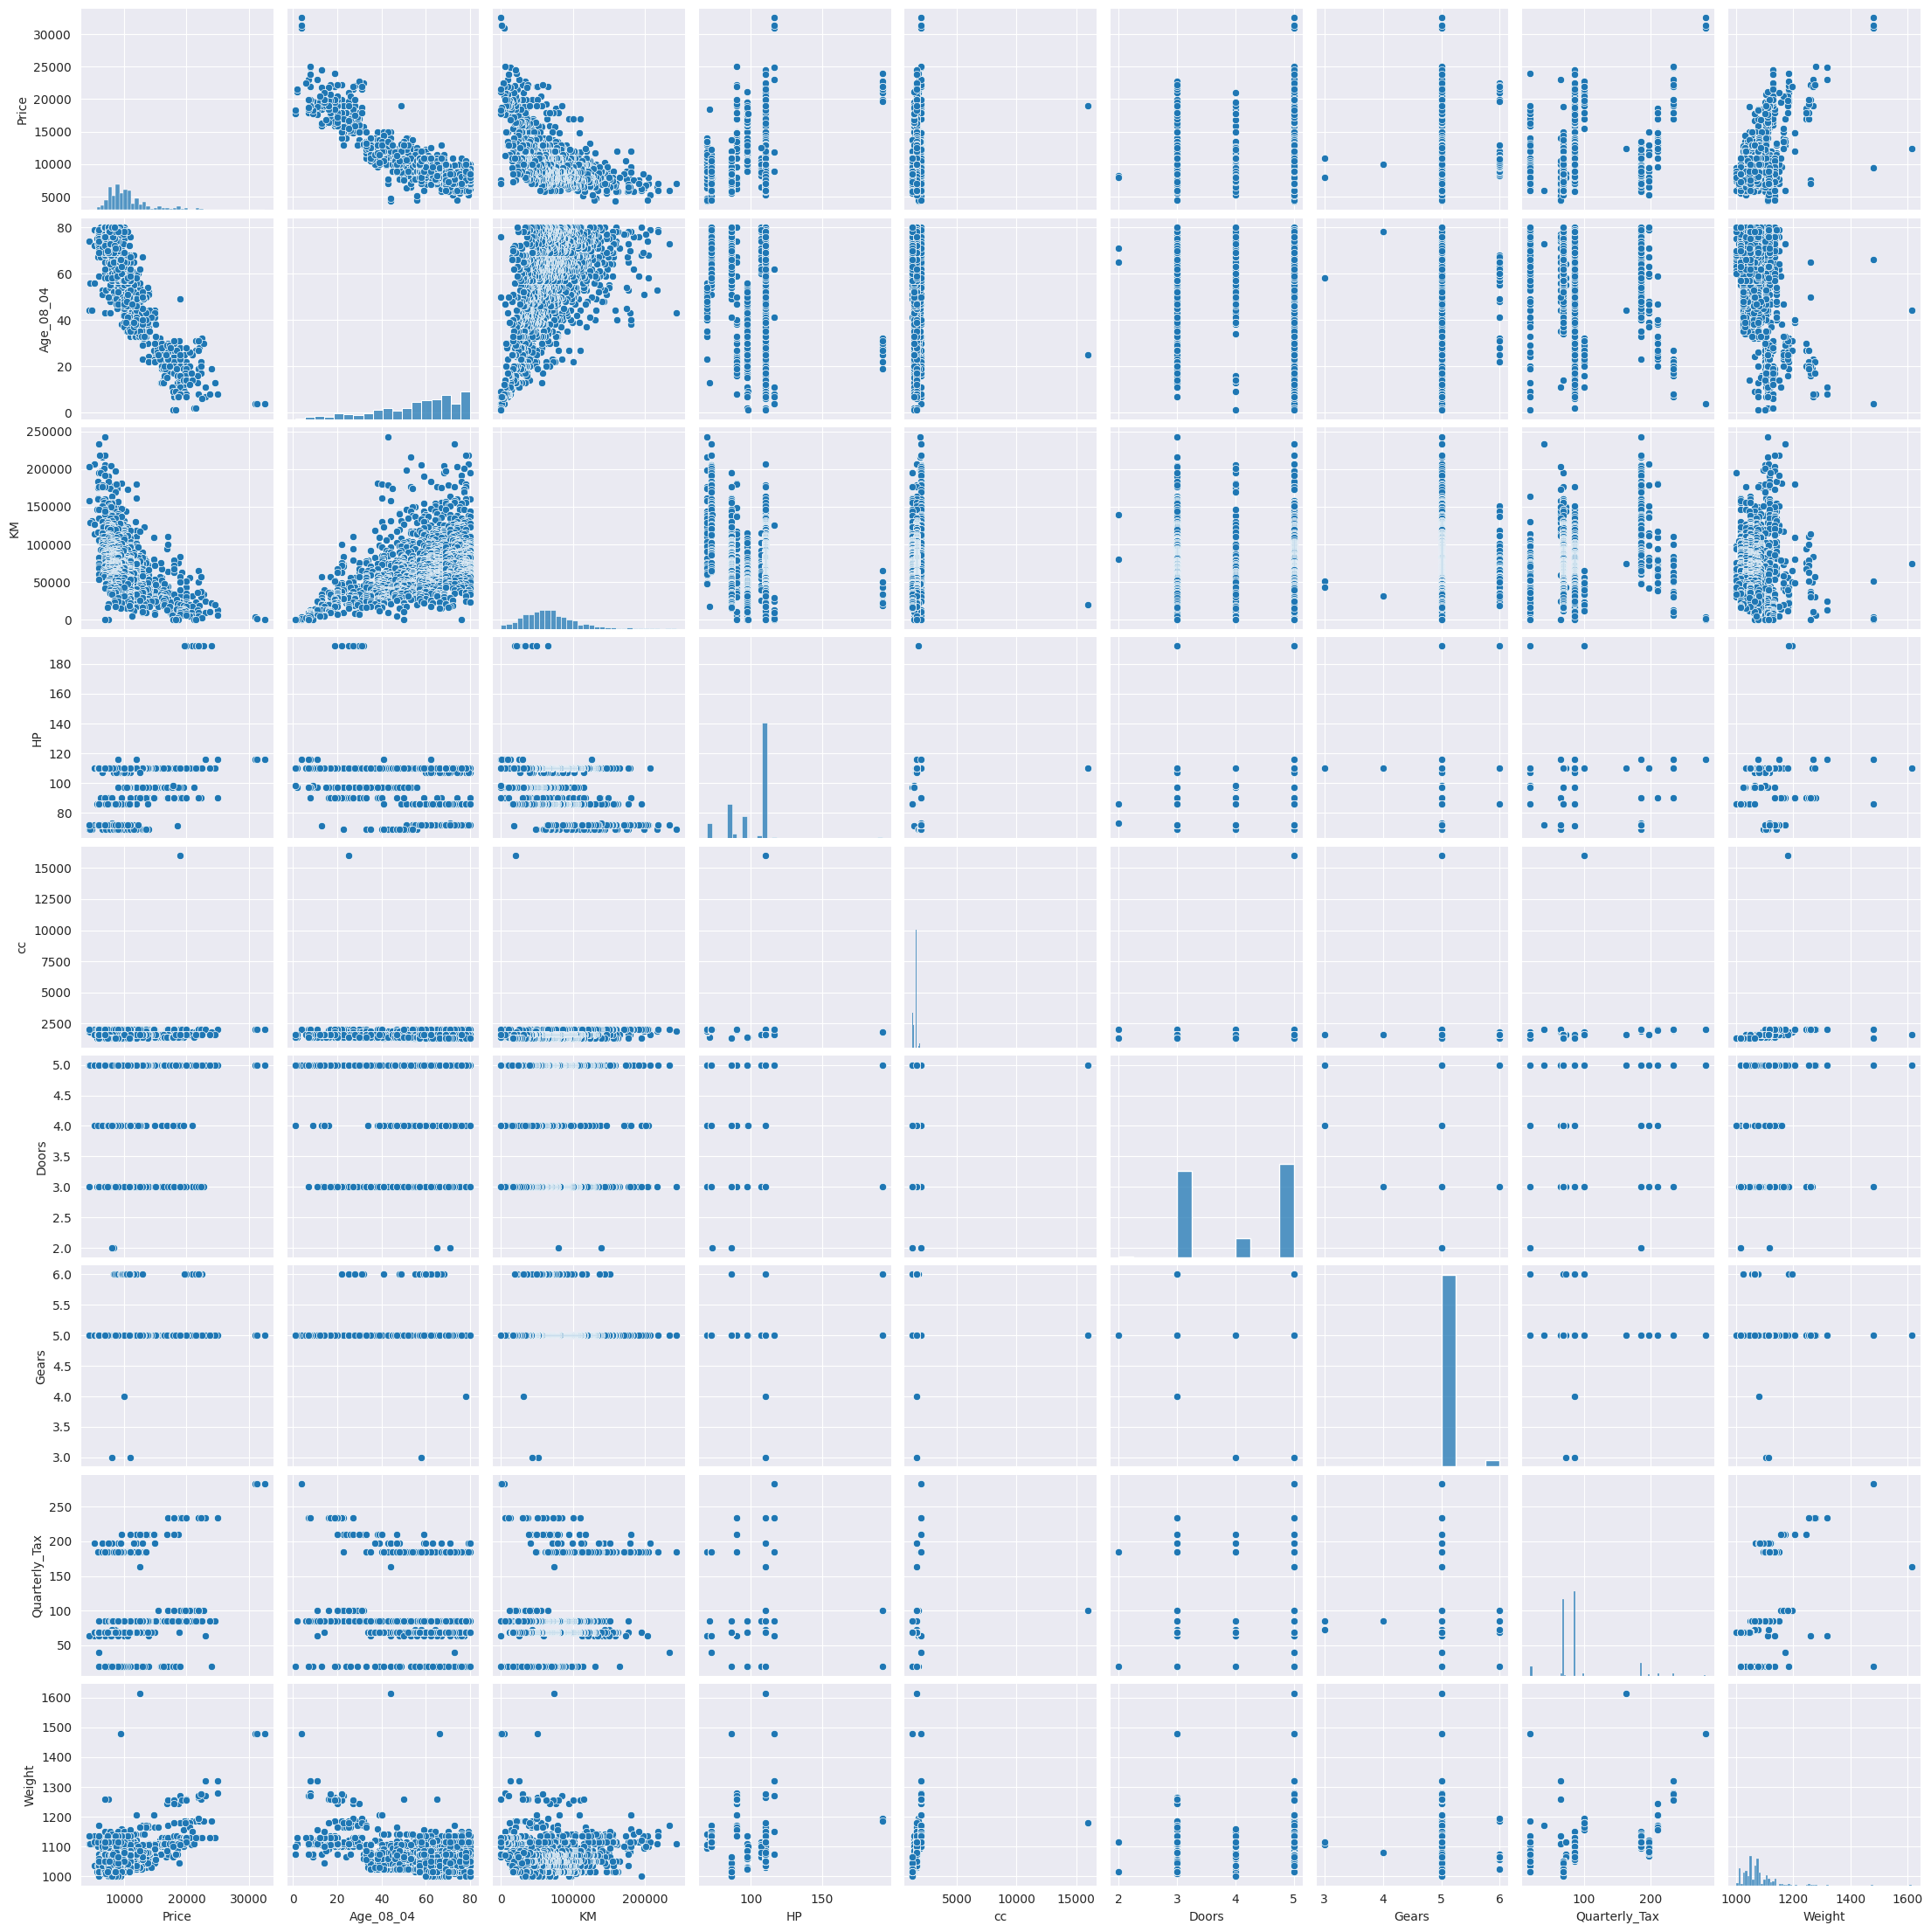

In [11]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota)

In [12]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit()

In [13]:
model.params

Intercept       -5511.709095
Age_08_04        -121.642680
KM                 -0.020793
HP                 31.761310
cc                 -0.119621
Doors               2.477763
Gears             598.201439
Quarterly_Tax       3.924582
Weight             16.855819
dtype: float64

In [14]:
print(model.tvalues, '\n', model.pvalues)

Intercept        -3.903883
Age_08_04       -46.506174
KM              -16.602745
HP               11.268655
cc               -1.327892
Doors             0.061810
Gears             3.035928
Quarterly_Tax     2.995514
Weight           15.755693
dtype: float64 
 Intercept         9.908458e-05
Age_08_04        5.135173e-288
KM                9.960014e-57
HP                2.827426e-28
cc                1.844265e-01
Doors             9.507230e-01
Gears             2.441457e-03
Quarterly_Tax     2.787126e-03
Weight            1.109354e-51
dtype: float64


In [15]:
(model.rsquared,model.rsquared_adj)

(0.8633639580756418, 0.8625968785420314)

In [16]:
rsq_age = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_age = 1/(1-rsq_age) # 16.33

rsq_km =  smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_km = 1/(1-rsq_km) # 564.98

rsq_hp =  smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_hp = 1/(1-rsq_hp) #  564.84

rsq_cc =  smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_cc = 1/(1-rsq_cc) #  16.35

rsq_do =  smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_do = 1/(1-rsq_do) #  16.35

rsq_ge =  smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_ge = 1/(1-rsq_ge) #  16.35

rsq_qt =  smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=toyota).fit().rsquared
vif_qt = 1/(1-rsq_qt) #  16.35

rsq_wt =  smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=toyota).fit().rsquared
vif_wt = 1/(1-rsq_wt) #  16.35

# Storing vif values in a data frame
d1 = {'Variables':['Age_08_04','KM', 'HP','cc','Doors','Gears','Quarterly_Tax', 'Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_do,vif_ge,vif_qt,vif_wt]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Age_08_04,1.880430
1,KM,1.755703
2,HP,1.419408
3,cc,1.163143
4,Doors,1.159731
5,Gears,1.098868
6,Quarterly_Tax,2.298233
7,Weight,2.506682


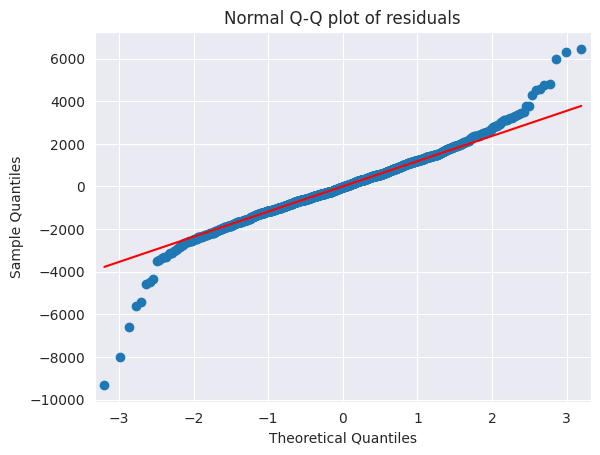

In [17]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()